In [13]:
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
import math
from src.config import dados_treino, dados_teste


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

In [2]:
df = pd.read_csv(dados_treino)
df_teste = pd.read_csv(dados_teste)

### Análise inicial

In [10]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [25]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Data cleanig

### Tratamento de variaveis nulas

In [14]:
df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

In [16]:
colunas_nulas = df.isnull().sum().sort_values(ascending=False).head(20).index
df[colunas_nulas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PoolQC        7 non-null      object 
 1   MiscFeature   54 non-null     object 
 2   Alley         91 non-null     object 
 3   Fence         281 non-null    object 
 4   MasVnrType    588 non-null    object 
 5   FireplaceQu   770 non-null    object 
 6   LotFrontage   1201 non-null   float64
 7   GarageYrBlt   1379 non-null   float64
 8   GarageCond    1379 non-null   object 
 9   GarageType    1379 non-null   object 
 10  GarageFinish  1379 non-null   object 
 11  GarageQual    1379 non-null   object 
 12  BsmtFinType2  1422 non-null   object 
 13  BsmtExposure  1422 non-null   object 
 14  BsmtQual      1423 non-null   object 
 15  BsmtCond      1423 non-null   object 
 16  BsmtFinType1  1423 non-null   object 
 17  MasVnrArea    1452 non-null   float64
 18  Electrical    1459 non-null 

In [18]:
colunas_para_analise = df.columns[(df.isnull().sum()/df.shape[0]) > 0.1]

In [20]:
for col in colunas_para_analise:
    print('-' * 30)
    print(df.value_counts(col))

------------------------------
LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
38.0       1
39.0       1
111.0      1
112.0      1
128.0      1
Name: count, Length: 110, dtype: int64
------------------------------
Alley
Grvl    50
Pave    41
Name: count, dtype: int64
------------------------------
MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64
------------------------------
FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64
------------------------------
PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64
------------------------------
Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64
------------------------------
MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64


Olhei na documentação se as variaveis nulas representavam algo, se sim fiz o tratamento

In [5]:
df['LotFrontage'] = df['LotFrontage'].fillna(0)
df['PoolQC'] = df['PoolQC'].fillna('No Pool')
df['MiscFeature'] = df['MiscFeature'].fillna('None')
df['Alley'] = df['Alley'].fillna('No alley access')
df['Fence'] = df['Fence'].fillna('No Fence')
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['FireplaceQu'] = df['FireplaceQu'].fillna('No Fireplace')
df['GarageCond'] = df['GarageCond'].fillna('No Garage')
df['GarageType'] = df['GarageType'].fillna('No Garage')
df['GarageFinish'] = df['GarageFinish'].fillna('No Garage')
df['GarageQual'] = df['GarageQual'].fillna('No Garage')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('No Basement')
df['BsmtExposure'] = df['BsmtExposure'].fillna('No Basement')
df['BsmtQual'] = df['BsmtQual'].fillna('No Basement')
df['BsmtCond'] = df['BsmtCond'].fillna('No Basement')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No Basement')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df = df.fillna(-1)

In [7]:
df.isnull().sum().sort_values(ascending=False).head(1)

Id    0
dtype: int64

## First model ML (threshold)

In [26]:
col_threshold = df.columns[df.dtypes != 'object']

In [28]:
df_threshold = df.loc[:,col_threshold]

In [36]:
X = df_threshold.drop('SalePrice',axis=1)
y = df_threshold.SalePrice

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [80]:
reg_rl = LinearRegression().fit(X_train, y_train)
reg_dt = tree.DecisionTreeRegressor().fit(X_train, y_train)
reg_knn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)

In [84]:
y_pred_rl = reg_rl.predict(X_test)
y_pred_dt = reg_dt.predict(X_test)
y_pred_knn = reg_knn.predict(X_test)

In [98]:
print(metrics.mean_absolute_error(y_test,y_pred_rl))
print(metrics.mean_absolute_error(y_test,y_pred_dt))
print(metrics.mean_absolute_error(y_test,y_pred_knn))

23803.698501050592
29053.340248962657
33264.81742738589


In [100]:
print(metrics.mean_squared_error(y_test,y_pred_rl))
print(metrics.mean_squared_error(y_test,y_pred_dt))
print(metrics.mean_squared_error(y_test,y_pred_knn))

1538566820.3616393
2554812598.2946057
2733850870.3599586


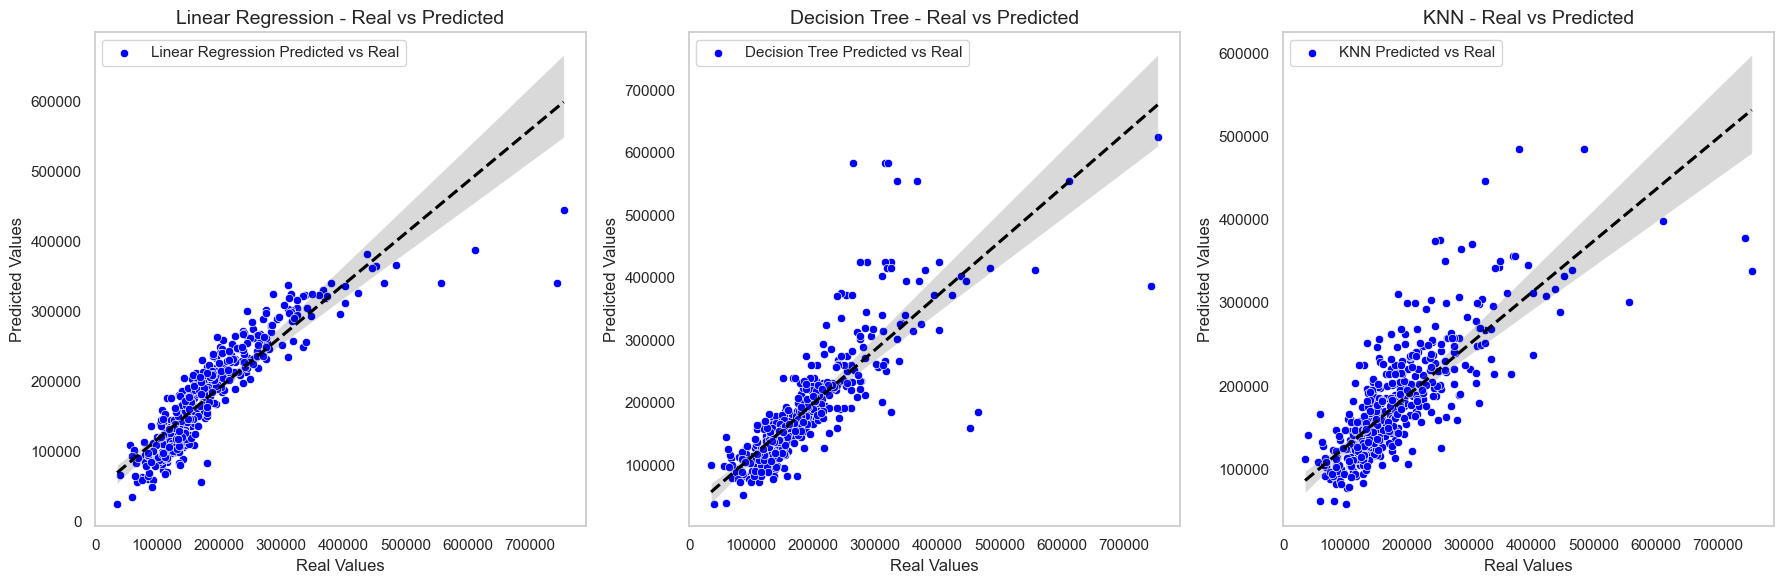

In [116]:
# Create a figure with subplots for each model
fig, axes = plt.subplots(1, 3, figsize=(18, 6), dpi=100)

# List of models and their predictions
models = ['Linear Regression', 'Decision Tree', 'KNN']
predictions = [y_pred_rl, y_pred_dt, y_pred_knn]

# Loop through each model to create its scatter plot
for i, model in enumerate(models):
    ax = axes[i]
    sns.scatterplot(x=y_test, y=predictions[i], ax=ax, color='blue', label=f'{model} Predicted vs Real')

    # Add a dashed trendline for each model
    sns.regplot(x=y_test, y=predictions[i], scatter=False, ax=ax, color='red', line_kws={"linestyle": "dashed", "color": "black"})

    # Set labels and title
    ax.set_title(f'{model} - Real vs Predicted', fontsize=14)
    ax.set_xlabel('Real Values', fontsize=12)
    ax.set_ylabel('Predicted Values', fontsize=12)
    ax.grid(False)  # Remove gridlines

# Adjust layout for better spacing
plt.tight_layout()
plt.show()